In [1]:
import networkx as nx
import matplotlib.pyplot as plt
#import pandas as pd
import csv

In [51]:
G = nx.MultiDiGraph()
with open('relac2.csv', encoding='utf8',newline='') as f:
    reader = csv.reader(f)
    relac = [tuple(row) for row in reader]

In [52]:
for i in relac: 
    G.add_edge(i[0], i[1], relac = i[2])

Spring Layout


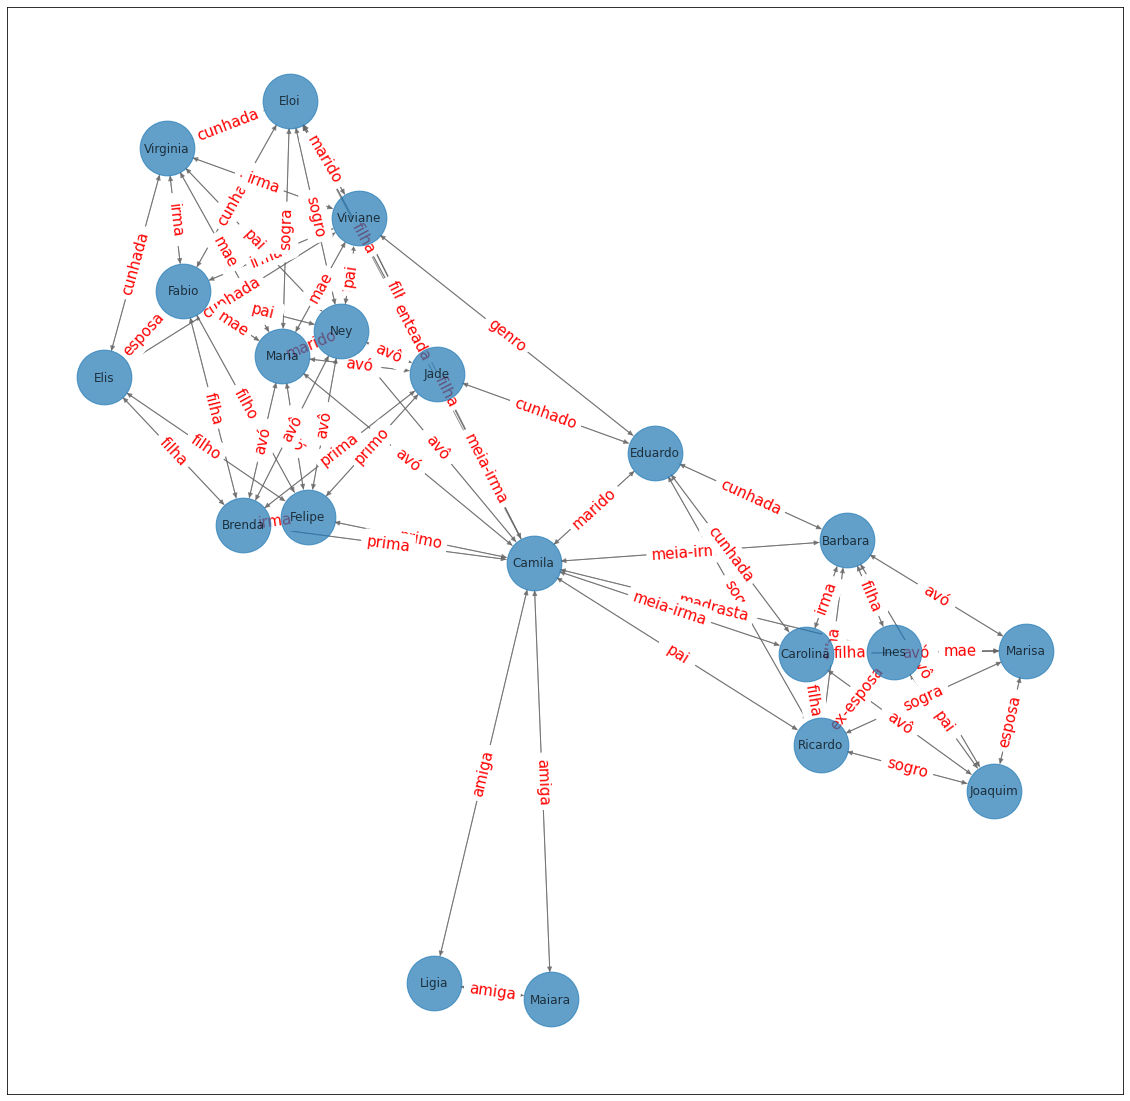

In [53]:
plt.figure(figsize =(20, 20)) 
pos = nx.spring_layout(G) 
print("Spring Layout") 
  
nx.draw_networkx(G, pos,  
                 alpha = 0.7,  
                 with_labels = True,node_size = 3000,  
                 edge_color ='.4', cmap = plt.cm.Blues) 
edge_labels = nx.get_edge_attributes(G,'relac') 
formatted_edge_labels = {(elem[0],elem[1]):edge_labels[elem] for elem in edge_labels} 
nx.draw_networkx_edge_labels(G,pos,edge_labels=formatted_edge_labels,font_color='red',font_size=15)
plt.show()

In [10]:
from pyvis.network import Network

In [54]:
nt = Network("500px", "900px", notebook = True, directed = True)
nt.from_nx(G)
nt.show("grafo.html")

# Densidade: mostra o quão conectada é a rede
A densidade da rede é a proporção de arestas existente na rede em relação a todas as arestas possíveis entre os vértices. Sendo uma proporção, esta quantidade varia entre 0 e 1, sendo que quanto mais próxima de 1 mais densa é rede.

In [45]:
nx.density(G)

0.35

# Número de vértices

In [46]:
G.number_of_nodes()

20

# Número de arestas

In [47]:
G.number_of_edges()

133

# Vizinhos

In [55]:
#Lista somente os vértices que recebem o 'direcionamento'
list(G.neighbors('Jade'))

['Viviane', 'Eloi', 'Camila', 'Maria', 'Ney', 'Brenda', 'Felipe', 'Eduardo']

# Grau/ordem de um vértice é o número de aresta ligada ao nó

In [49]:
G.degree['Jade']

16

# Caminho mais curto entre um vértice e outro

In [66]:
# Descobre o caminho de custo mínimo (ccm) do vértice '1' até '2' 
ccm = nx.dijkstra_path(G,source = 'Jade', target = 'Marisa')
print('Caminho de custo mínimo: ',ccm)

Caminho de custo mínimo:  ['Jade', 'Camila', 'Ricardo', 'Marisa']


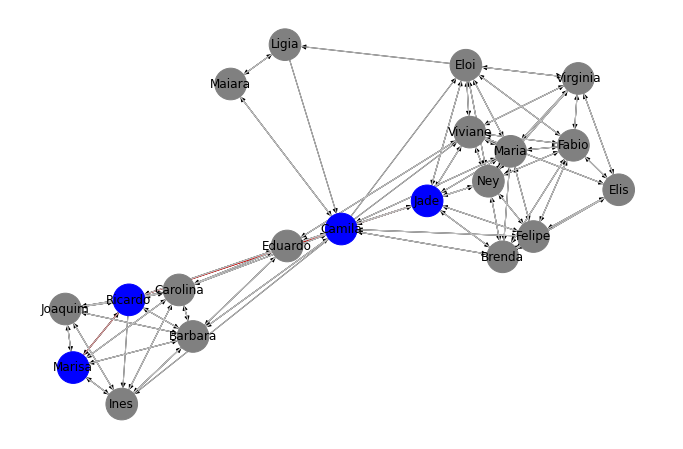

In [32]:
# Separa as arestas que fazem parte do menor caminho e guarda em arestas_vermelhas
arestas_vermelhas = list(zip(ccm,ccm[1:]))

# Marca os vértices que estão no CCM para serem pintados de azul e os outros de cinza
cor_vertices = ['grey' if not node in ccm else 'blue' for node in G.nodes()]

# Marca as arestas que estão no CCM para serem pintados de vermelho e as outras de prata
cor_arestas = ['silver' if not edge in arestas_vermelhas else 'red' for edge in G.edges()]

# plot da figura
plt.figure(1, figsize=(12, 8))

#Algoritmo de layout
pos=nx.fruchterman_reingold_layout(G)

#retira as bordas
plt.axis('off')

nx.draw_networkx(G, pos,node_color= cor_vertices, node_size=1000)
nx.draw_networkx_edges(G, pos,edge_color= cor_arestas)

plt.show()

# Medidas de Centralidade
Centralidade é uma medida de quão importante um vértice é no contexto de toda a rede. 

## Grau de Centralidade
São considerados mais centrais os vértices com maior quantidade de arestas, de forma que quando a rede é plotada, quanto maior o grau de um vértice, mais ao centro da rede ele estará

In [59]:
sorted(G.degree, key=lambda x: x[1], reverse=True)

[('Camila', 26),
 ('Maria', 18),
 ('Ney', 18),
 ('Viviane', 17),
 ('Jade', 16),
 ('Fabio', 16),
 ('Ricardo', 14),
 ('Barbara', 14),
 ('Carolina', 14),
 ('Felipe', 14),
 ('Brenda', 14),
 ('Eloi', 13),
 ('Eduardo', 12),
 ('Ines', 12),
 ('Virginia', 12),
 ('Elis', 10),
 ('Joaquim', 10),
 ('Marisa', 10),
 ('Maiara', 4),
 ('Ligia', 4)]

In [60]:
centrality = nx.degree_centrality(G)
sorted(centrality.items(), reverse= True, key=lambda x: x[1])[:5]

[('Camila', 1.3684210526315788),
 ('Maria', 0.9473684210526315),
 ('Ney', 0.9473684210526315),
 ('Viviane', 0.894736842105263),
 ('Jade', 0.8421052631578947)]

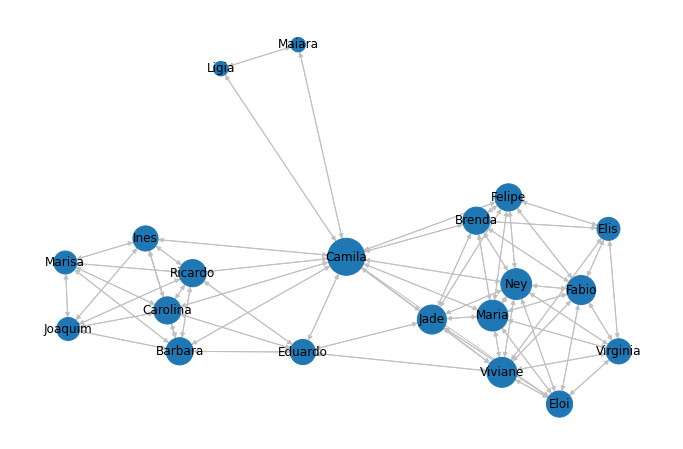

In [61]:
dg = nx.degree_centrality(G)
plt.figure(1, figsize=(12, 8))
plt.axis('off')
nx.draw_networkx(G, node_size=[v * 1000 for v in dg.values()], edge_color='silver')

## Closeness
Esta medida de centralidade tenta expressar a importância de um vértice pelo fato dele estar próximo a muitos outros vértices.Quanto mais central for um nó, mais próximo estará de todos os outros nós.
Mede o número de caminhos mais curtos em que o nó se encontra. Essa centralidade costuma ser usada para determinar o fluxo de informações no gráfico Quanto maior o número, mais informações fluem por ele.

In [68]:
for k, v in sorted(nx.closeness_centrality(G).items(), reverse= True, key=lambda x: x[1]):
    print(k, ':', v)

Camila : 0.7307692307692307
Viviane : 0.6129032258064516
Maria : 0.6129032258064516
Ney : 0.6129032258064516
Jade : 0.59375
Eduardo : 0.59375
Eloi : 0.5757575757575758
Felipe : 0.5757575757575758
Brenda : 0.5757575757575758
Ricardo : 0.5428571428571428
Barbara : 0.5428571428571428
Carolina : 0.5428571428571428
Ines : 0.5135135135135135
Fabio : 0.475
Virginia : 0.4523809523809524
Elis : 0.4418604651162791
Maiara : 0.4418604651162791
Ligia : 0.4418604651162791
Joaquim : 0.3877551020408163
Marisa : 0.3877551020408163


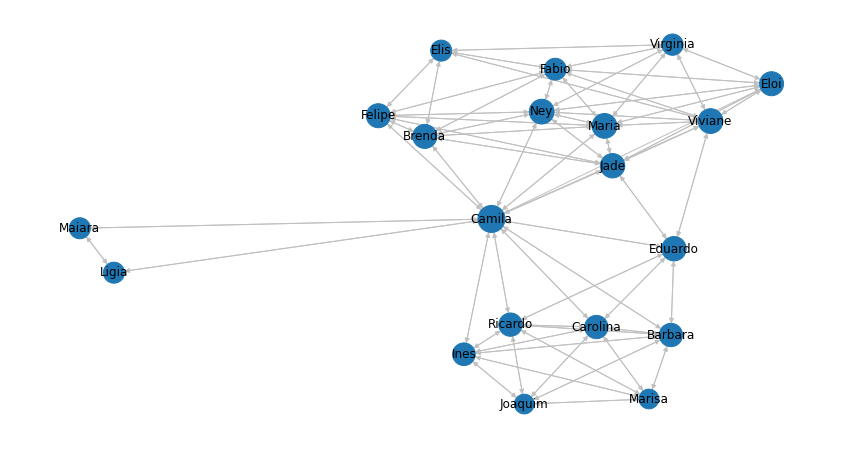

In [69]:
cc = nx.closeness_centrality(G)
plt.figure(1, figsize=(15, 8))
plt.axis('off')
nx.draw_networkx(G, node_size=[v * 1000 for v in cc.values()], edge_color='silver')

## Betweenness
Esta medida de centralidade reconhece como mais importantes os vértices que se localizam na rede de tal forma se localizem entre outros pares de vértices.
Quantifica o número de vezes que o nó age como ponte ao longo do caminho mais curto entre dois nós.
Medida para quantificar o controle de um ser humano sobre a comunicação entre outros seres humanos numa rede social.

In [70]:
for k, v in sorted(nx.betweenness_centrality(G).items(), reverse= True, key=lambda x: x[1]):
    print(k, ':', v)

NetworkXNotImplemented: not implemented for multigraph type

In [71]:
bc = nx.betweenness_centrality(G)
plt.figure(1, figsize=(12, 8))
plt.axis('off')
nx.draw_networkx(G, node_size=[v * 15000 for v in bc.values()], edge_color='silver')

NetworkXNotImplemented: not implemented for multigraph type

## Centralidade de autovetor
Atribui maiores pesos aos vértices que estão conectados a outros vértices também importantes

In [72]:
for k, v in sorted(nx.eigenvector_centrality(G).items(), reverse= True, key=lambda x: x[1]):
    print(k, ':', v)

NetworkXNotImplemented: not implemented for multigraph type

In [73]:
egvector = nx.eigenvector_centrality(G)
plt.figure(1, figsize=(12, 8))
plt.axis('off')
nx.draw_networkx(G, node_size=[v * 10000 for v in egvector.values()], edge_color='silver')

NetworkXNotImplemented: not implemented for multigraph type